# Distance from a point to a hyperplane

Generally, let $(x_1, x_2, \ldots, x_n)$ be a point in $n$-dimensional space and the distance from the point to the hyperplane is given by the formula:

$$\frac{|w_1x_1 + w_2y_2 + \ldots + w_ny_n + b |}{\sqrt{w_1^2 + w_2^2 + \ldots + w_n^2}} = \frac{|\mathbf{w}^T\mathbf{x}_0 + b|}{||\mathbf{w}||_2}$$

where $b$ is the bias term.

# Main idea of SVM

Let us return to the problem in Perceptron Learning Algorithm (PLA). Suppose that there are two different classes described by points in a high-dimensional space, these two classes are linearly separable, that is, there exists a hyperplane that exactly separates the two classes. Let us find a hyperplane that separates the two classes, that is, all points belonging to one class lie on the same side of that hyperplane and all points belonging to the other class lie on the opposite side. We already know that PLA can do this, but it can give us an infinite number of solutions as shown in *Figure 1* below:

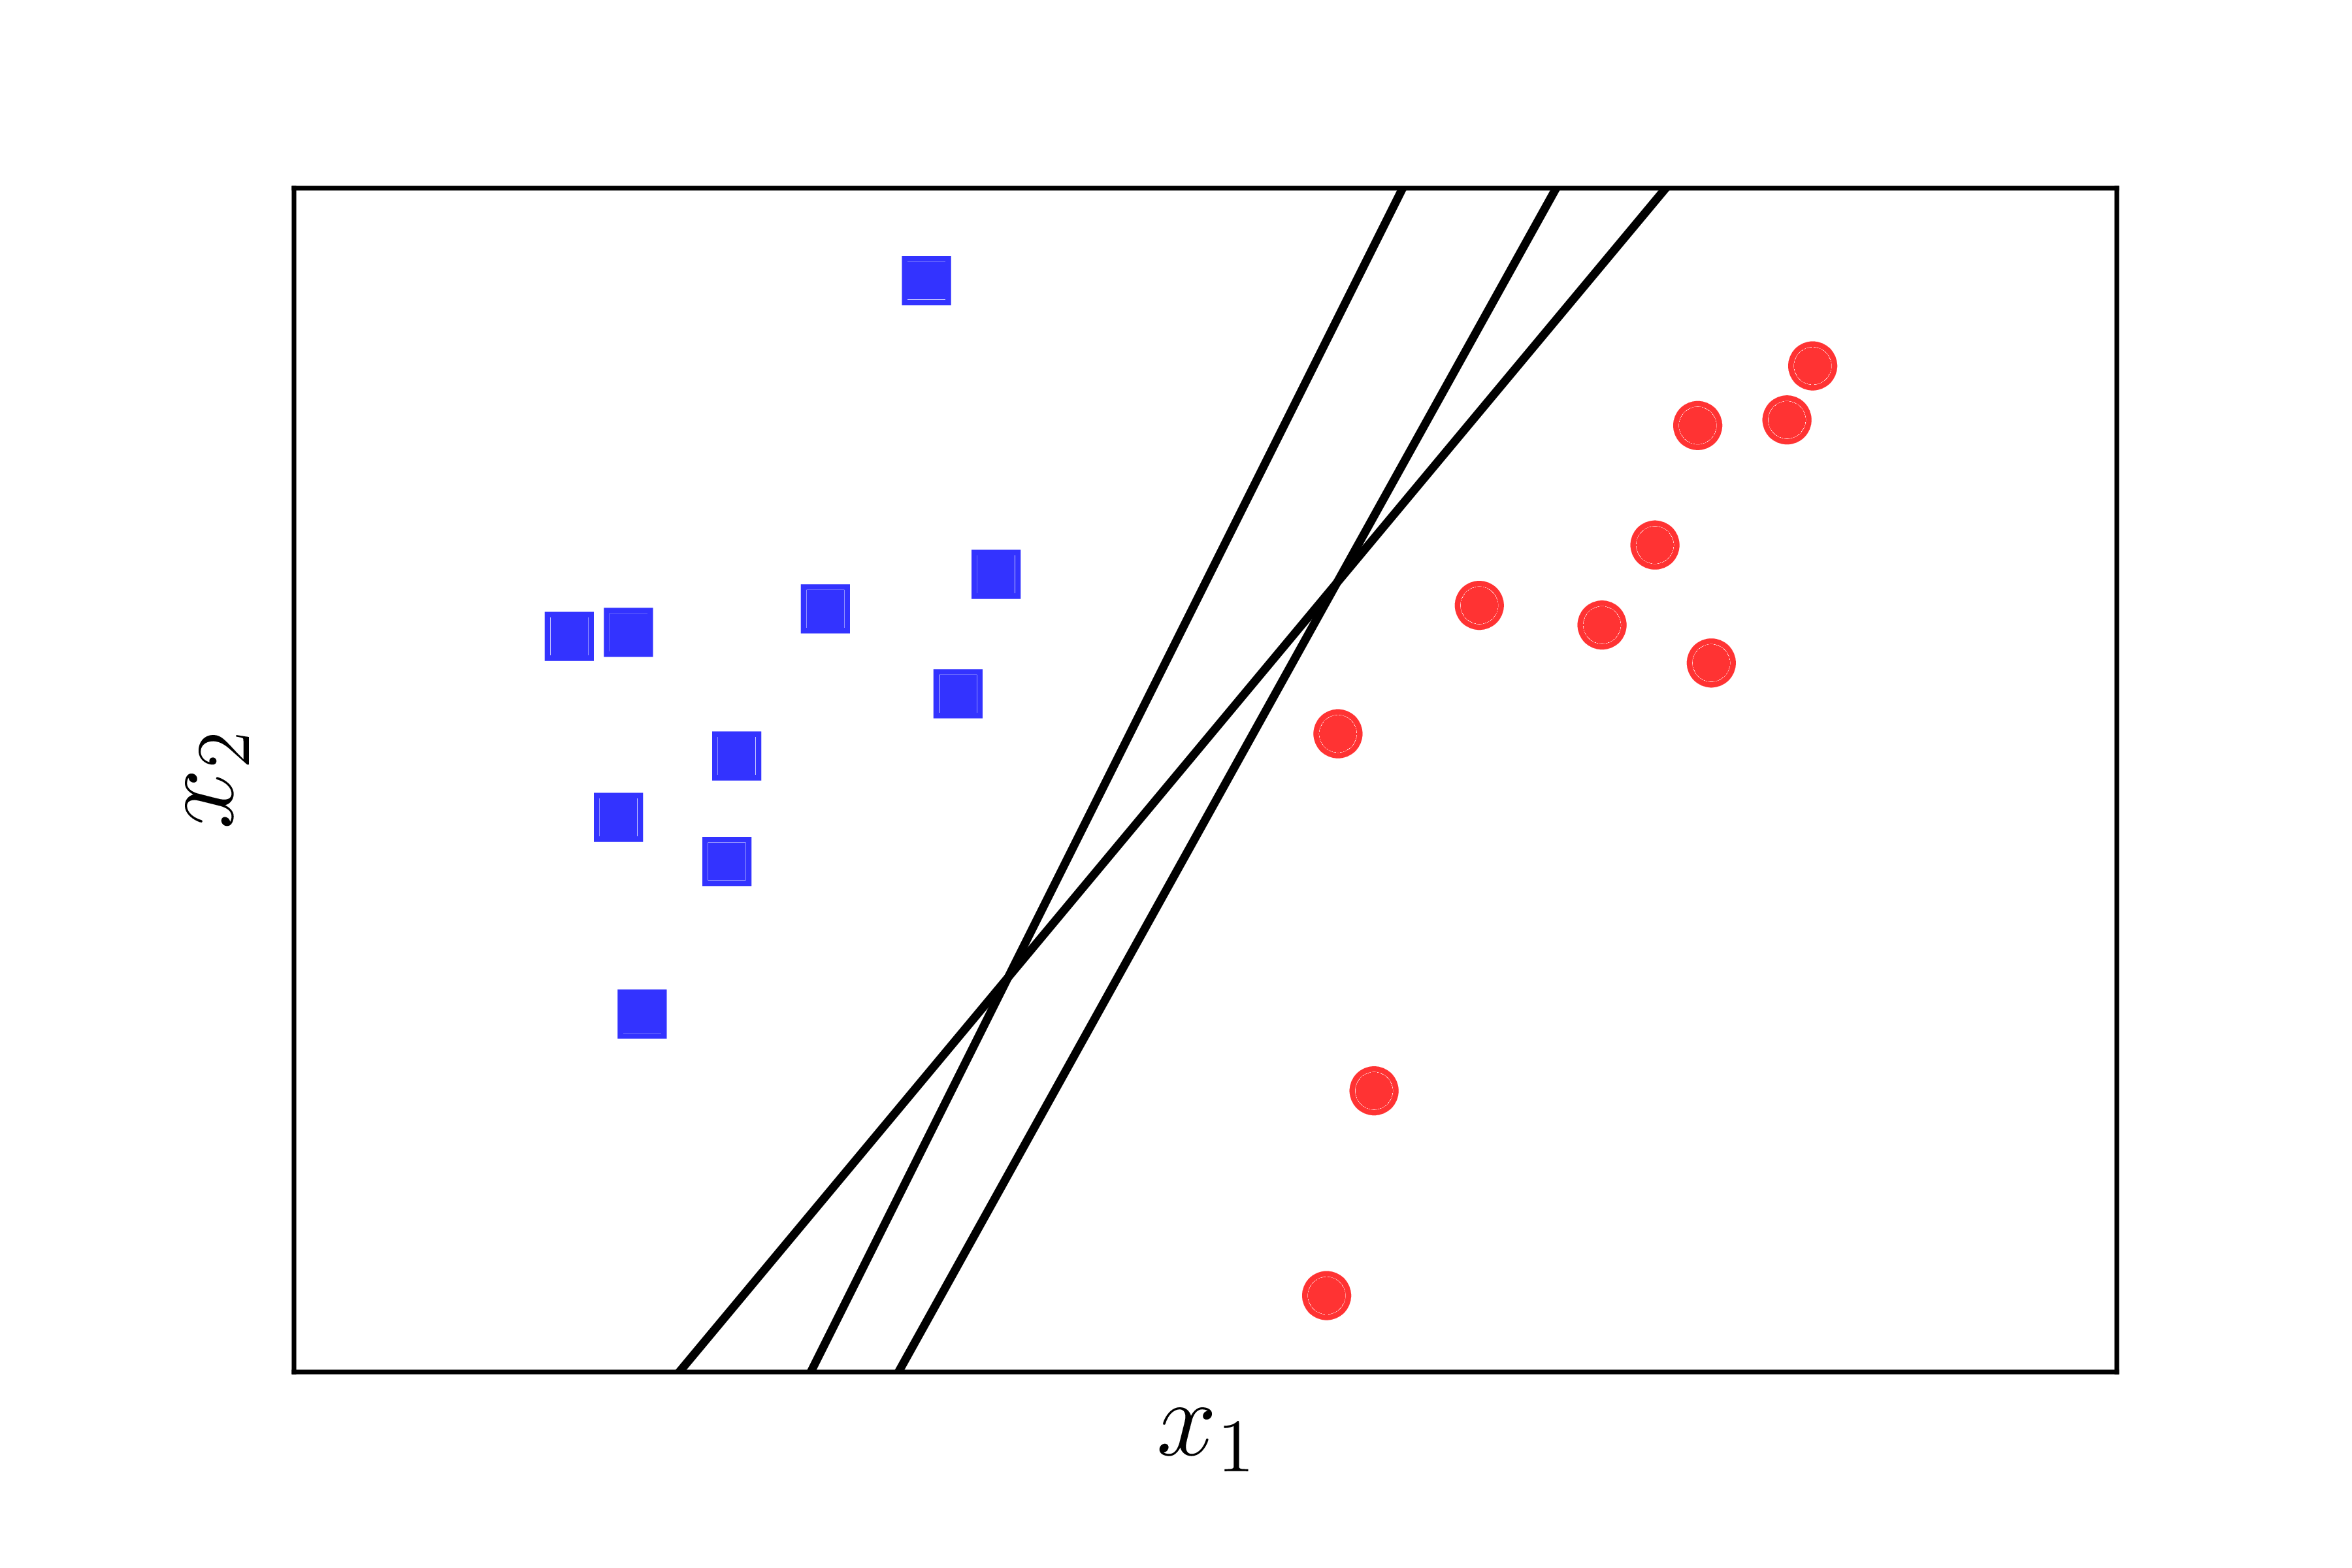

*Figure 1: Three different dividing lines that separate the two classes*

The question is: among those infinite number of dividing planes, which is the best dividing plane according to some criterion? Of the three lines illustrated in Figure 1 above, there are two lines that are quite biased towards the red circle class. This may make the red class unhappy because its territory seems to be encroached too much. Is there a way to find a dividing line that makes both classes feel the most fair and happy?

We need to find a standard to measure the happiness of each class. Consider Figure 2 below:

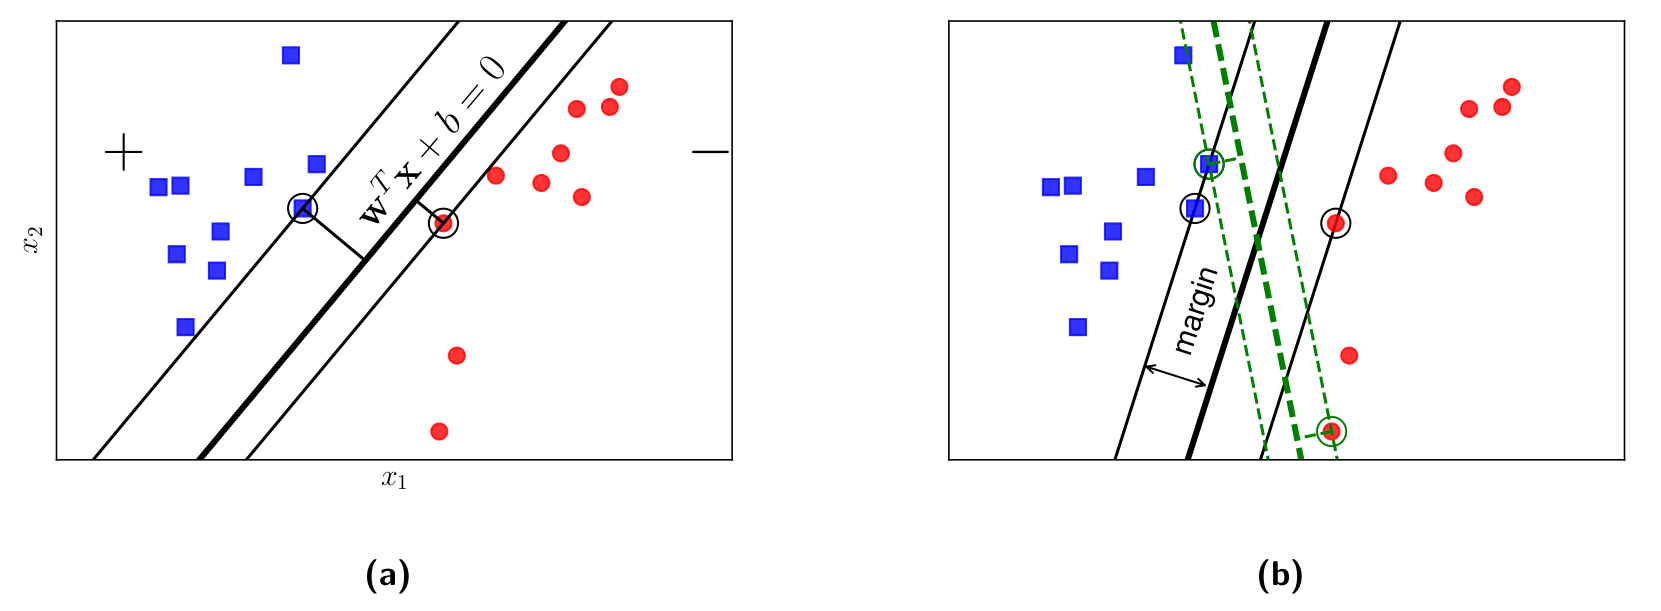

*Figure 2: The margin of two classes is equal and as large as possible* 

If we define the happiness of a class as being proportional to the closest distance from a point of that class to the dividing line/surface, then in Figure 2 on the left, the red circle class will not be very happy because the dividing line is much closer to it than the blue square class. We need a dividing line such that the distance from the closest point of each class (the circled points) to the dividing line is the same, then it is fair. This equal distance is called the margin.

We have fairness, we need to be civilized. Fairness where both are equally unhappy is not very civilized.

Let us consider Figure 2 on the right where the distance from the dividing line to the closest points of each class is the same. Considering the two ways of dividing by the solid black line and the dashed green line, which one will make both classes happier? Obviously it must be the solid black line because it creates a wider margin.

A wider margin will give a better classification effect because the division between the two classes is more distinct. This, as you will see later, is a quite important point that helps Support Vector Machine bring better classification results than Neural Network with 1 layer, i.e. Perceptron Learning Algorithm.

The optimization problem in Support Vector Machine (SVM) is the problem of finding the division line so that the margin is the largest. This is also the reason why SVM is also called Maximum Margin Classifier. The origin of the name Support Vector Machine will be clarified soon.

# The optimization problem in SVM

Suppose that the data pairs in the training set are $\left(\mathrm{x}_1, y_1\right),\left(\mathrm{x}_2, y_2\right), \ldots,\left(\mathrm{x}_N, y_N\right)$ with vector $\mathbf{x}_i \in \mathbb{R}^d$ representing the input of a data point and $y_i$ being the label of that data point, $d$ being the dimensionality of the data and $N$ being the number of data points. Suppose that the label of each data point is determined by $y_i=1$ or $y_i=-1$ as in PLA.

For ease of visualization, let us work with examples in two-dimensional space. Suppose that the blue points are labeled 1 , the red circles are labeled -1 , and the surface $\mathbf{w}^T \mathbf{x}+b=$ $w_1 x_1+w_2 x_2+b=0$ is the dividing surface between the two layers (*Figure 3*). Furthermore, the blue layer lies on the positive side, the red layer lies on the negative side of the dividing surface. If the opposite were true, we would simply change the signs of $\mathbf{w}$ and $b$. We need to find the hyperplane described by the coefficients w and $b$.

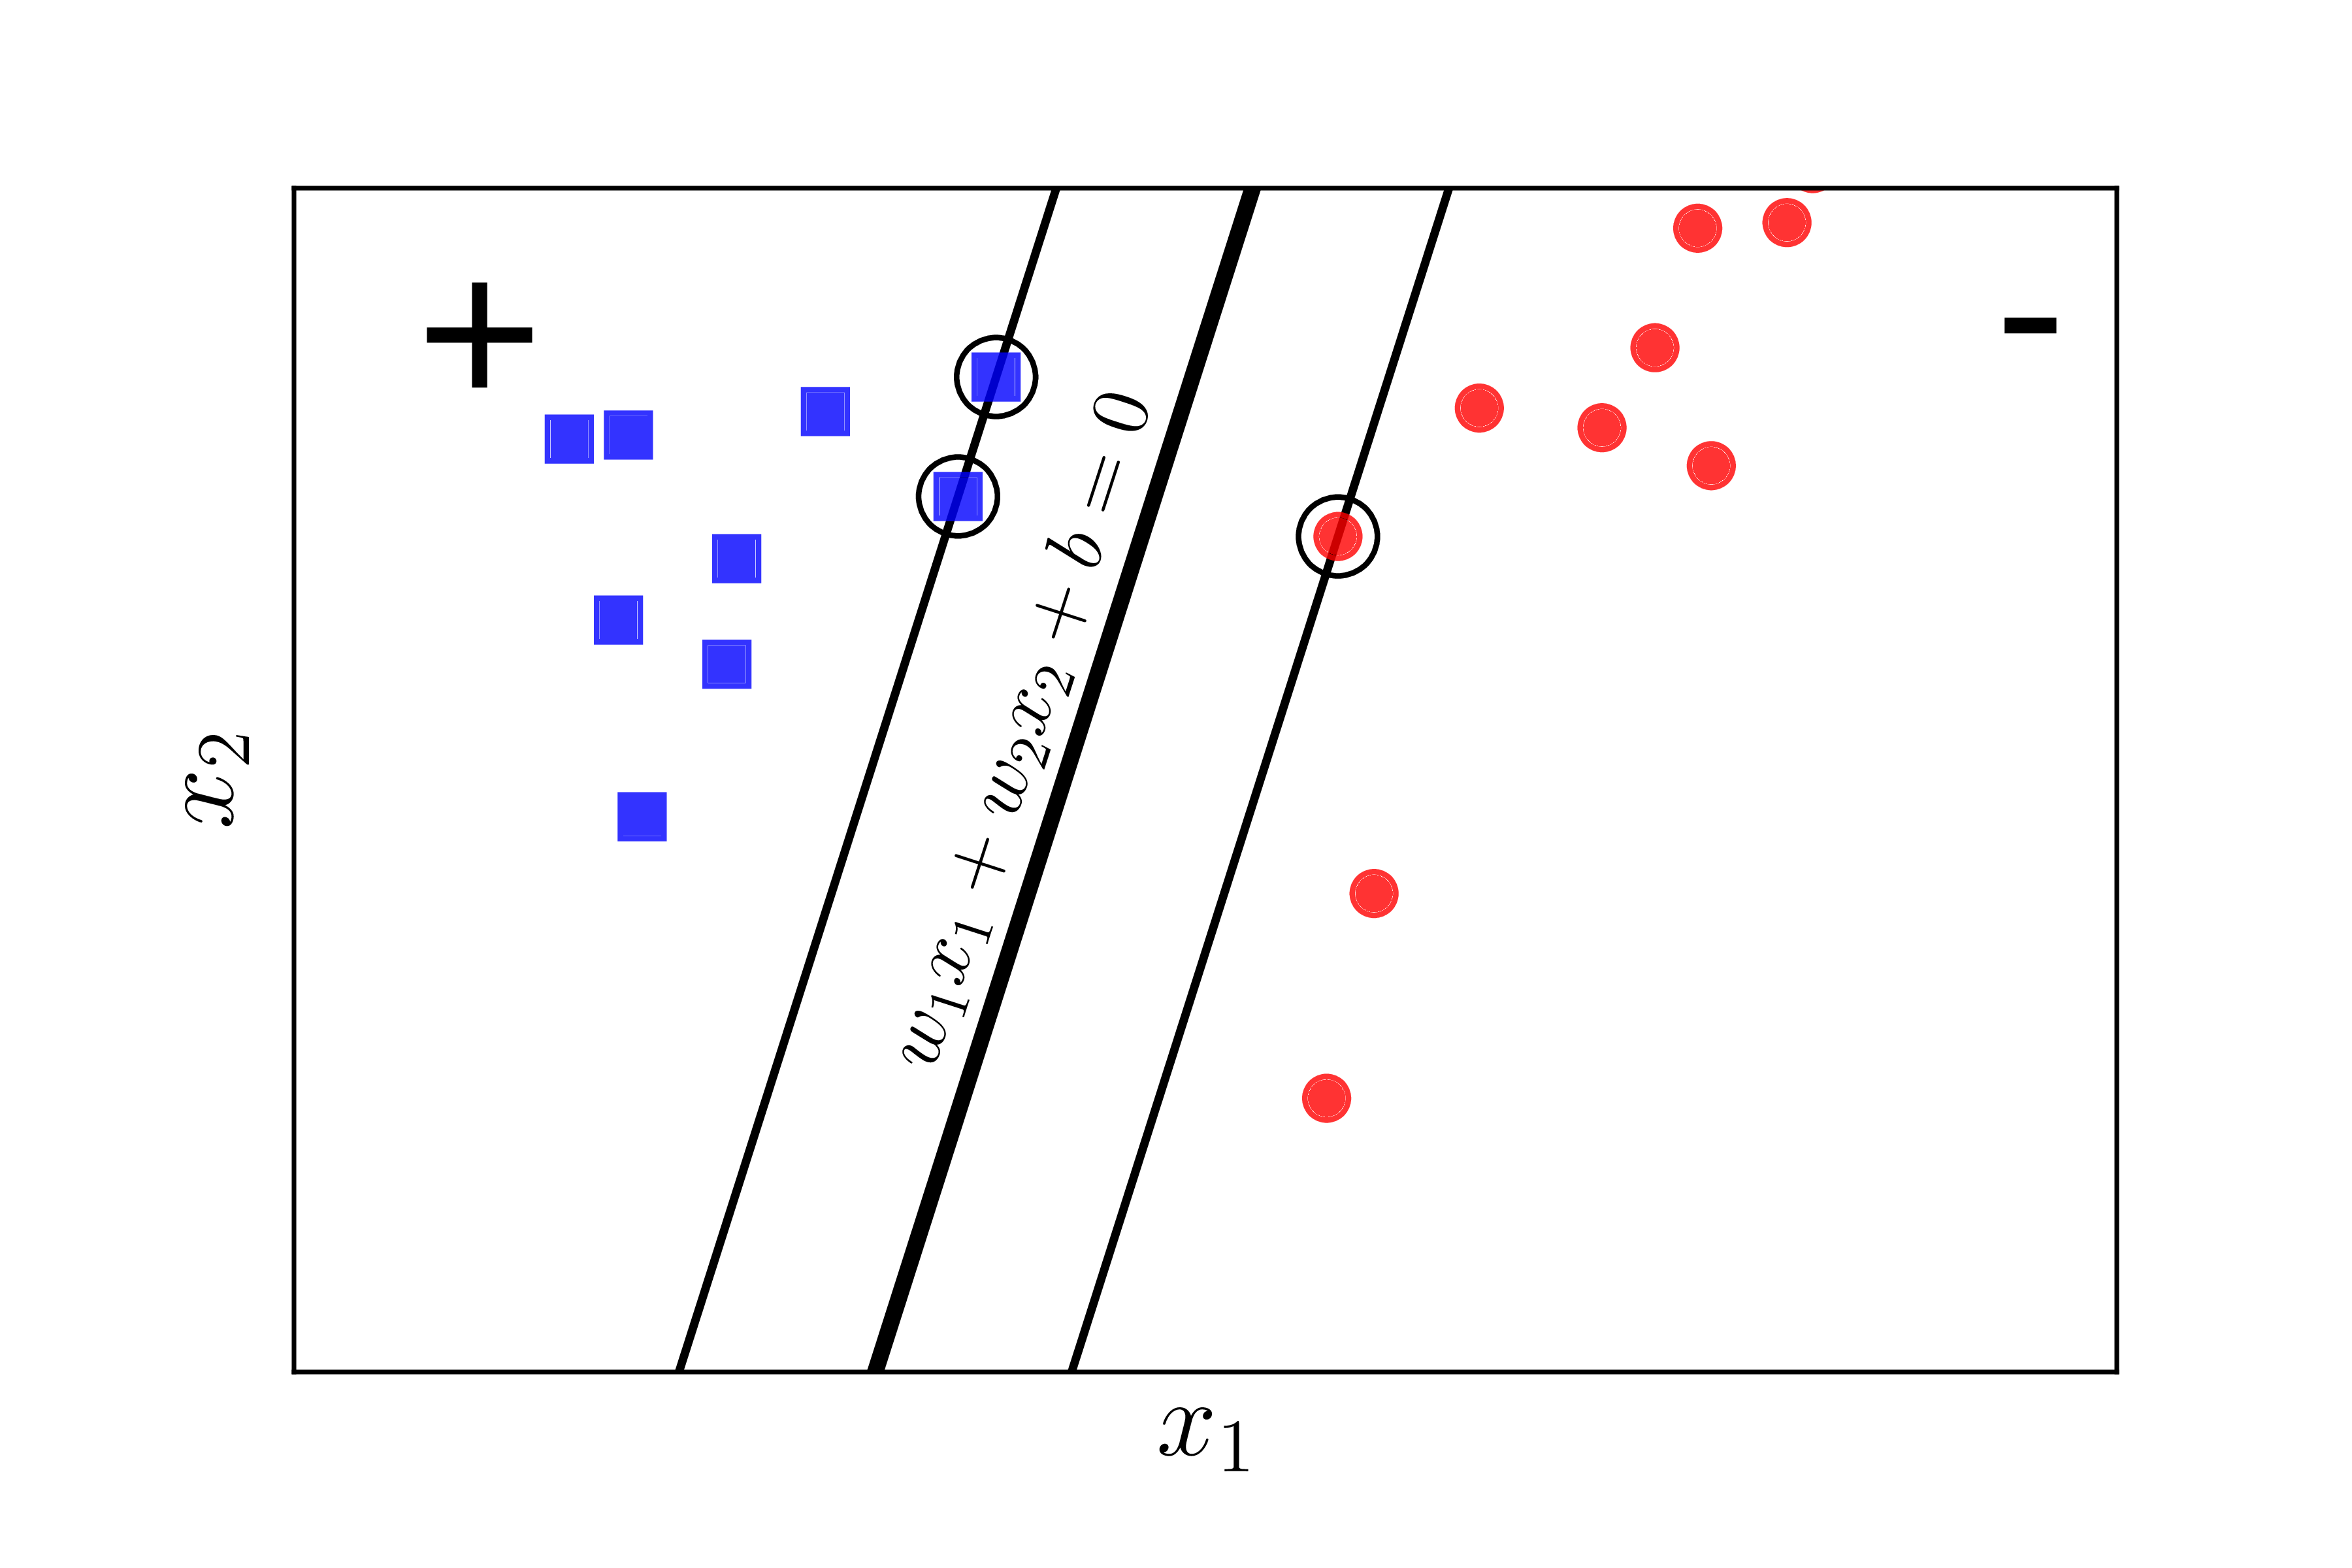

*Figure 3: Analyze SVM problem*

We observe an important point as follows. For any pair of data $\left(\mathbf{x}_n, y_n\right)$, the distance from that point to the dividing plane is

$$
\frac{y_n\left(\mathbf{w}^T \mathbf{x}_n+b\right)}{\|\mathbf{w}\|_2}
$$

This can be seen because by the above assumption, $y_n$ always has the same sign as the side of $\mathbf{x}_n$. From this, $y_n$ has the same sign as $\left(\mathbf{w}^T \mathbf{x}_n+b\right)$, so the numerator is always a non-negative quantity.

With the above division surface, the margin is calculated as the closest distance from a point to that surface (regardless of which point is in the two classes):

$$\text{margin} = \min_{n} \frac{y_n(\mathbf{w}^T\mathbf{x}_n + b)}{||\mathbf{w}||_2}$$

The optimization problem of SVM is to find $\mathbf{w}$ and $b$ so that this margin reaches the largest value:

$$(\mathbf{w}, b) = \arg\max_{\mathbf{w}, b} \left\{
    \min_{n} \frac{y_n(\mathbf{w}^T\mathbf{x}_n + b)}{||\mathbf{w}||_2} 
\right\}
= \arg\max_{\mathbf{w}, b}\left\{
    \frac{1}{||\mathbf{w}||_2} \min_{n} y_n(\mathbf{w}^T\mathbf{x}_n + b)
\right\} \tag{1}
$$

The most important observation is that if we replace the coefficient vector $\mathbf{w}$ by $k\mathbf{w}$ and $b$ by $kb$ where $k$ is a positive constant, the dividing surface does not change, i.e. the distance from each point to the dividing surface does not change, i.e. the margin does not change.

Consider the following case, for all $n$, we have:

$$y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1$$

So the optimization problem $(1)$ can be reduced to the following constrained optimization problem:

$$
\begin{align*}
    (\mathbf{w}, b) &= \arg \max_{\mathbf{w}, b} \frac{1}{||\mathbf{w}||_2}   \newline
    \text{subject to:}~ & y_n(\mathbf{w}^T\mathbf{x}_n + b) \geq 1, \forall n = 1, 2, \dots, N \tag{2}
\end{align*}
$$

By a simple transformation, we can reduce this problem to the following problem:

$$
\begin{align*}
    (\mathbf{w}, b) &= \arg \min_{\mathbf{w}, b} \frac{1}{2}||\mathbf{w}||_2^2   \newline
    \text{subject to:}~ & 1 - y_n(\mathbf{w}^T\mathbf{x}_n + b) \leq 0, \forall n = 1, 2, \dots, N \tag{3}
\end{align*}
$$

Here, we have taken the inverse of the objective function, squared it to get a differentiable function, and multiplied by $\dfrac{1}{2}$ to make the derivative expression nicer.

**Important observation:** In problem $(3)$, the objective function is a norm, so it is a convex function. The constraint inequality functions are linear functions in $\mathbf{w}$ and $b$, so they are also convex functions. So the optimization problem $(3)$ has a convex objective function, and the constraint functions are also convex, so it is a convex problem. Furthermore, it is a Quadratic Programming. In fact, the objective function is strictly convex because $||\mathbf{w}||_2^2 = \mathbf{w}^T\mathbf{I}\mathbf{w}$ and $\mathbf{I}$ is the identity matrix - which is a positive definite matrix. From this we can deduce that the solution for SVM is unique.

At this point, this problem can be solved using tools that support Quadratic Programming, such as CVXOPT.

However, solving this problem becomes more complicated when the dimensionality $d$ of the data space and the number of data points $N$ increase.

People often solve the dual problem of this problem. First, the dual problem has more interesting properties that make it more efficient to solve. Second, in the process of formulating the dual problem, people found that SVM can be applied to problems where the data is not linearly separable, that is, the dividing lines are not a plane but can be surfaces with more complex shapes.

**Determining the class for a new data point:** Once the boundary $\mathbf{w}^T\mathbf{x} + b = 0$ has been found, the label of any point can be simply determined by:

$$\text{class}(\mathbf{x}) = \text{sgn} (\mathbf{w}^T\mathbf{x} + b)$$

# Dual problem for SVM

Recall that the optimization problem $(3)$ is a convex problem. We know that: if a convex problem satisfies the Slater criterion, then strong duality is satisfied. And if strong duality is satisfied, then the solution to the problem is the solution of the KKT condition system.

## Check Slater criterion

In this step, we will prove that the optimization problem $(3)$ satisfies the Slater condition. The Slater condition states that, if there exists $\mathbf{w}, b$ such that:

$$1 - y_n(\mathbf{w}^T\mathbf{x}_n + b) < 0, ~~\forall n = 1, 2, \dots, N$$

then strong duality is satisfied. This check is not too complicated. Since we know that there is always a hyperplane separating two classes if the two classes are linearly separable, i.e. the problem has a solution, the feasible set of the optimization problem $(3)$ must be nonempty. That is, there always exists a pair $(\mathbf{w}_0 , b_0)$ such that:

$$
\begin{align*}
1 - y_n(\mathbf{w}_0^T\mathbf{x}_n + b_0) &\leq& 0, ~~\forall n = 1, 2, \dots, N \newline
\Leftrightarrow 2 - y_n(2\mathbf{w}_0^T\mathbf{x}_n + 2b_0) &\leq& 0, ~~\forall n = 1, 2, \dots, N 
\end{align*}
$$

So we just need to choose $\mathbf{w}_1 = 2\mathbf{w}_0$ and $b_1 = 2b_0$, we will have:

$$1 - y_n(\mathbf{w}_1^T\mathbf{x}_n + b_1) \leq -1 < 0, ~~\forall n = 1, 2, \dots, N$$

Therefore, we derive that Slater's condition is satisfied.

## Lagrangian of SVM problem

The Lagrangian of the optimization problem $(3)$ is:

$$\mathcal{L}(\mathbf{w}, b, \lambda) = \frac{1}{2} ||\mathbf{w}||_2^2 + \sum_{n=1}^N \lambda_n(1 - y_n(\mathbf{w}^T\mathbf{x}_n + b) ) \tag{4}$$

where $\lambda = [\lambda_1, \lambda_2, \dots, \lambda_N]^T$ are the Lagrange multipliers, and $\lambda_n \geq 0, ~\forall n = 1, 2, \dots, N$.

## Lagrange dual function

By the definition of the Lagrange dual function, we have:

$$g(\lambda) = \min_{\mathbf{w}, b} \mathcal{L}(\mathbf{w}, b, \lambda)$$

where $\lambda \succeq 0$. Finding the minimum value of this function following $\mathbf{w}$ and $b$ is taken by solving system of derivative equations of $\mathcal{L}(\mathbf{w}, b, \lambda)$ with respect to $\mathbf{w}$ and $b$ being equal to zero:

$$
\begin{align*}
\frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial \mathbf{w}} &= \mathbf{w} - \sum_{n=1}^N \lambda_n y_n \mathbf{x}_n = 0 \Rightarrow \mathbf{w} = \sum_{n=1}^N \lambda_n y_n \mathbf{x}_n  \tag{5}\newline
\frac{\partial \mathcal{L}(\mathbf{w}, b, \lambda)}{\partial b} &=
-\sum_{n=1}^N \lambda_ny_n = 0 \tag{6}
\end{align*}
$$

Substitute $(5)$ and $(6)$ into $(4)$, we get $g(\lambda)$:

$$g(\lambda) = \sum_{n=1}^N \lambda_n  -\frac{1}{2}\sum_{n=1}^N \sum_{m=1}^N \lambda_n\lambda_m y_n y_m \mathbf{x}_n^T\mathbf{x}_m \tag{7}$$

This is the most important function in SVM, you will see more clearly in the Kernel SVM lesson.

By denoting a matrix:

$$\mathbf{V} = \left[y_1 \mathbf{x}_1, y_2 \mathbf{x}_2, \dots, y_N \mathbf{x}_N \right]$$

and $\mathbf{1} = [1, 1, \dots, 1]^T$, we can rewrite $g(\lambda)$ as:

$$g(\lambda) = -\frac{1}{2}\lambda^T\mathbf{V}^T\mathbf{V}\mathbf{\lambda} + \mathbf{1}^T\lambda \tag{8}$$

If we denote $\mathbf{K} = \mathbf{V}^T\mathbf{V}$, then $\mathbf{K}$ is a positive semi-definite matrix. Indeed, for all vector $\lambda$, we have:

$$\lambda^T\mathbf{K}\mathbf{\lambda} = \lambda^T\mathbf{V}^T\mathbf{V}\mathbf{\lambda} = ||\mathbf{V}\lambda||_2^2 \geq 0$$

So, $g(\lambda) = -\frac{1}{2}\lambda^T\mathbf{K}\mathbf{\lambda} + \mathbf{1}^T\lambda$ is a concave function.

## Lagrange dual problem

From there, combining the Lagrange dual function and the constraints of $\lambda$, we will obtain the Lagrange dual problem of problem $(3)$ in the form:

$$
\begin{align*}
     \lambda &= \arg \max_{\lambda} g(\lambda)   \newline
     \text{subject to:}~ & \lambda \succeq 0 \tag{9}\newline
     & \sum_{n=1}^N \lambda_ny_n = 0 \tag{6}
 \end{align*}
$$

The second constraint is derived from $(6)$. This is a convex problem because we are trying to find the maximum value of an objective function that is concave on a polyhedron. Furthermore, this problem is a quadratic programming problem and can also be solved using libraries such as `CVXOPT`.

In this dual problem, the number of parameters to be found is $N$, which is the dimension of $\lambda$, which is also the number of data points. Meanwhile, for the original problem $(3)$, the number of parameters to be found is $d + 1$, which is the sum of the dimensions of $\mathbf{w}$ and $b$, that is, the dimension of each data point plus $1$. In many cases, the number of data points in the training set is much larger than the dimension of the data. If solved directly using quadratic programming tools, the dual problem may be more complicated (and time-consuming) than the original problem. However, the appeal of this dual problem comes from the special structure of the KKT conditional system. In addition, the special form of the dual problem has helped scientists develop a summation form of SVM, making it work even when the two-class data is not linearly separable. We will discuss this case in detail in the Kernel SVM chapter.

## KKT conditions

Returning to the problem, since this is a convex problem and strong duality is satisfied, the solution of the problem will satisfy the following set of KKT conditions with the variable being $\mathbf{w}$, $b$, and $\lambda$:

$$
\begin{align*}
1 - y_n(\mathbf{w}^T\mathbf{x}_n + b) &\leq 0, ~ \forall n = 1, 2, \dots, N \tag{10} \newline
\lambda_n &\geq 0, ~\forall n = 1, 2, \dots, N  \newline
\lambda_n (1 - y_n(\mathbf{w}^T\mathbf{x}_n + b)) &= 0, ~\forall n = 1, 2, \dots, N \tag{11} \newline
 \mathbf{w} &= \sum_{n=1}^N \lambda_n y_n \mathbf{x}_n \tag{12}\newline 
 \sum_{n=1}^N \lambda_ny_n &= 0 \tag{13}
\end{align*}
$$

in which $(11)$ is the significant condition when applying KKT.

Of the above conditions, condition $(11)$ is the most interesting. From this we can immediately deduce that, for any $n$, either $\lambda_n=0$ or $1-y_n\left(\mathbf{w}^T \mathbf{x}_n+b\right)=0$. The second case is:

$$
\mathbf{w}^T \mathbf{x}_n+b=y_n
$$

with the observation that $y_n^2=1, \forall n$. The points satisfying $(14)$ are the points closest to the dividing line, which are circled in Figure 3 above. The two lines $\mathbf{w}^T \mathbf{x}_n+b= \pm 1$ rest on the points satisfying $(14)$. So the points (vectors) satisfying $(14)$ are also called Support Vectors. And from there, the name Support Vector Machine was born.

Another observation, the number of points satisfying $(14)$ often accounts for a very small number in the set of $N$ points. Based on these support vectors, we can completely determine the required interface. Looking at it another way, most of the $\lambda_n$ are $0$. So although the vector $\lambda \in \mathbb{R}^N$ can be very large in dimension, the number of its non-0$ elements is very small. In other words, the vector $\lambda$ is a sparse vector. Support Vector Machine is therefore also classified as Sparse Models. Sparse Models often have more efficient (faster) solutions than similar models with dense solutions (mostly non-0$). This is the second reason why the SVM dual problem is more interested than the original problem.

Continuing the analysis, for problems with small $N$ data points, we can solve the above KKT condition system by considering the cases $\lambda_n=0$ or $\lambda_n \neq 0$. The total number of cases to consider is $2^N$. With $N>50$ (usually like that), this is a very large number, solving it this way will not be feasible. I will not go into how to solve the KKT condition system, in the next section we will solve the problem to optimize $(9)$ using `CVXOPT` and using the Scikit-learn library.

After finding $\lambda$ from problem $(9)$, we can deduce $\mathbf{~ w}$ based on $(12)$ and $b$ based on $(11)$ and $(13)$. Clearly we are only interested in $\lambda_n \neq 0$.

Let $\mathcal{S}=\left\{n: \lambda_n \neq 0\right\}$ and $N_{\mathcal{S}}$ be the number of elements in $\mathcal{S}$. For each $n \in \mathcal{S}$, we have:

$$
1=y_n\left(\mathbf{w}^T \mathbf{x}_n+b\right) \Leftrightarrow b+\mathbf{w}^T \mathbf{x}_n=y_n
$$

Although from just one pair $\left(\mathbf{x}_n, y_n\right)$, we can immediately deduce $b$ if we know $\mathbf{w}$, another version to calculate $b$ that is commonly used and considered numerically more stable is:

$$
b=\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_n-\mathbf{w}^T \mathbf{x}_n\right)=\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_n-\sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x}_n\right) \tag{15}
$$

that is, the average of all the calculations of $b$ and before that, $\mathbf{w}$ was calculated in $(5)$.

Important observation: To determine which class a new point $\mathbf{x}$ belongs to, we need to determine the sign of the expression:

$$
\mathbf{w}^T \mathbf{x}+b=\sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x}+\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_n-\sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x}_n\right)
$$

This expression depends on how the dot product between $\mathbf{x}$ and each $x_m \in \mathcal{S}$ is computed. This important observation will help us in the Kernal SVM chapter.

# Programming for finding SVM solutions

In this section, I will represent two approaches to solve the SVM problem. The first approach is based on the $(9)$ problem along with $(12), (15)$ formulas. The second approach is based on the `Scikit-learn` library. Remind once more time: 

- The $(9)$ problem:
$$
\begin{align*}
     \lambda &= \arg \max_{\lambda} g(\lambda) = \arg \max_{\lambda} [\lambda^T\mathbf{K}\mathbf{\lambda} + \mathbf{1}^T\lambda]  \newline
     \text{subject to:}~ & \lambda \succeq 0 \newline
     & \sum_{n=1}^N \lambda_ny_n = 0 
 \end{align*}
$$

- The $(12)$ formula:
$$\mathbf{w} = \sum_{n=1}^N \lambda_n y_n \mathbf{x}_n = \mathbf{V}\lambda$$

- The $(15)$ formula:
$$b=\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_n-\mathbf{w}^T \mathbf{x}_n\right)=\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_n-\sum_{m \in \mathcal{S}} \lambda_m y_m \mathbf{x}_m^T \mathbf{x}_n\right)$$

## Find solutions by solving the dual problem

In [1]:
import numpy as np

np.random.seed(1234)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10

X0 = np.random.multivariate_normal(means[0], cov, N) # blue class data
X1 = np.random.multivariate_normal(means[1], cov, N) # red class data
X = np.concatenate((X0, X1), axis = 0) # all data

y = np.concatenate((np.ones((N, 1)), -1*np.ones((N, 1))), axis = 0) # labels

In [2]:
from cvxopt import matrix, solvers

V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V)) # see definition of V, K near eq (8)
p = matrix(-np.ones((2*N, 1))) # $\mathbf{1}$
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1))) # h in $\lambda_n \geq h = 0$
A = matrix(y.reshape(1, -1))
b = matrix(np.zeros((1, 1)))

solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)
l = np.array(sol['x'])

print('lambda = ', l.T)

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 388.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
lambda =  [[2.25168075e-09 1.00429930e-09 1.52744297e+00 1.27434895e-09
  2.42961870e+00 9.63721434e-10 1.96447482e-09 5.06679973e-09
  1.50684387e-09 1.09171332e-09 9.13503348e-10 1.27593098e-09
  2.41566963e-09 1.32394872e-09 1.00330972e-09 8.87687942e-10
  5.40370093e-09 2.56485683e-09 1.06505943e-09 3.95706167e+00]]


In [32]:
eps = 1e-6
S = np.where(l > eps)[0]

V_S = V[:, S]
y_S = y[S]
X_S = X.T[:, S]
l_S = l[S]

w = V_S.dot(l_S)
b = np.mean(y_S.T - w.T.dot(X_S))

print('Number of support vectors =', S.size)
print('w = ', w.T)
print('b = ', b)

Number of support vectors = 3
w =  [[-2.6866025  -0.83444009]]
b =  8.943273045799296


In [34]:
w.shape

(2, 1)

Text(0, 0.5, '$x_2$')

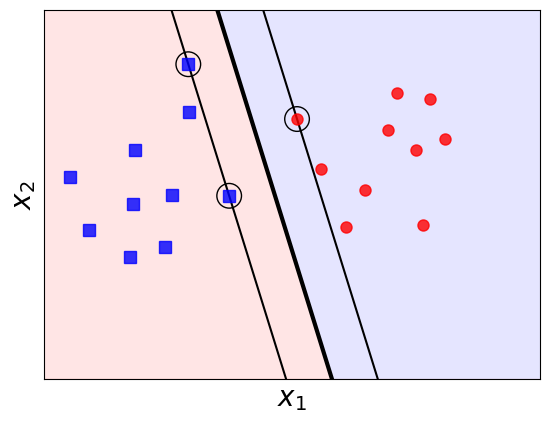

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x1 = np.arange(-10, 10, .1)
y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')

y4 = 10 * x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color='blue', alpha=0.1)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# add circles around support vectors 
for m in S:
    circle = plt.Circle((X.T[0, m], X.T[1, m]), 0.1, color='k', fill = False)
    ax.add_artist(circle)


plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

## Finding solutions by using the Scikit-learn library

In [38]:
from sklearn.svm import SVC

clf = SVC(kernel = 'linear', C = 1e5) # C is large, so no soft-margin
y = y.reshape((2*N,))
clf.fit(X, y)

w = clf.coef_
b = clf.intercept_

print('w = ', w)
print('b = ', b)

w =  [[-2.68666002 -0.83455791]]
b =  [8.94366343]
